# Exploratory Data Analysis (Formatted Zone)
Filtering approaches and time series generation

In [1]:
from database_settings import postgres_utilities
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Seaborn setup
sns.set_style("darkgrid")

## Explore filtering approaches

In [3]:
# Establish the connection with the Persistent Zone
engine = postgres_utilities.engine()

Connected to Formatted Zone successfully!


In [4]:
# See the distribution of rows with respect to boarding_date
exports_year = postgres_utilities.run_query_file(engine, './queries/boarding_date_year.sql')
exports_year = pd.DataFrame(exports_year).sort_values(by='year', ascending=True)
exports_year

,year,count,proportion
9,2010,1,0.0001
11,2011,8,0.0005
2,2013,48,0.0032
5,2014,287,0.0193
7,2015,639,0.0430
3,2016,30207,2.0348
1,2017,165630,11.1574
4,2018,203702,13.7221
10,2019,213825,14.4040
6,2020,210072,14.1512


In [5]:
# Defining the filters
# net weight: See the percentage of data kept if you set a filter based on the net weight
net_weight_threshold = 100
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/net_weight_filter_definition.sql',
                                           params={'net_weight_threshold': net_weight_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Net weight: By removing those exports with a net weight of less than {}kg, we keep {}% of the data.".format(net_weight_threshold, proportion))

# value_usd: See the percentage of data kept if you set a filter based on the usd_value
value_usd_threshold = 200
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/value_usd_filter_definition.sql',
                                           params={'value_usd_threshold': value_usd_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Usd value: By removing those exports with a value of less than ${}, we keep {}% of the data.".format(value_usd_threshold, proportion))

# heading: See the percentage and count of data kept if you set a filter based on the count of headings
headings_count_threshold = 1000
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/headings_count_filter_definition_1.sql',
                                           params={'headings_count_threshold': headings_count_threshold})
proportion = round(float(proportion[0][0])*100,2)
count = postgres_utilities.run_query_file(engine,
                                           './queries/headings_count_filter_definition_2.sql',
                                           params={'headings_count_threshold': headings_count_threshold})
print("Heading: By removing those exports whose heading's count is less than {}, we keep {}% of the data. That is {} from {} headings.".format(headings_count_threshold, proportion, count[0][0], count[0][1]))


# boarding_date: See the percentage of data kept if you set a filter based on the boarding_date
year_threshold = 2017
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/boarding_date_filter_definition.sql',
                                           params={'year_threshold': year_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("Boarding date: By removing those exports with a boarding date before {}, we keep {}% of the data.".format(year_threshold, proportion))

Net weight: By removing those exports with a net weight of less than 100kg, we keep 96.72% of the data.
Usd value: By removing those exports with a value of less than $200, we keep 96.83% of the data.
Heading: By removing those exports whose heading's count is less than 1000, we keep 98.45% of the data. That is 51 from 169 headings.
Boarding date: By removing those exports with a boarding date before 2017, we keep 97.9% of the data.


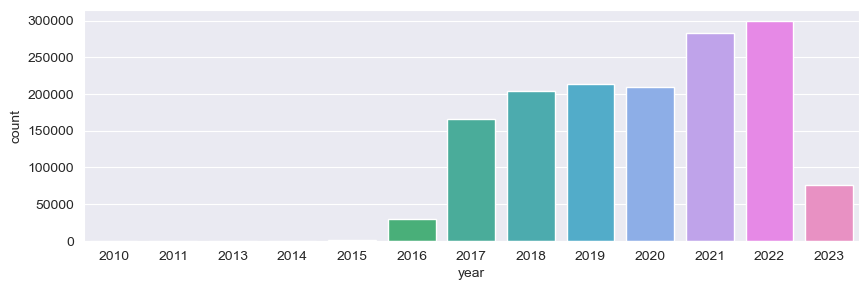

In [6]:
# Bar chart
plt.figure(figsize=(10,3))
sns.barplot(x='year', y='count', data=exports_year)
plt.show()

In [7]:
# Get the data after all the filters
proportion = postgres_utilities.run_query_file(engine,
                                           './queries/filtered_data_definition.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
proportion = round(float(proportion[0][0])*100,2)
print("All filters: By applying all filtering approaches we keep {}% of the data.".format(proportion))

All filters: By applying all filtering approaches we keep 93.04% of the data.


## Get a heading's time series

In [8]:
# Get the available headings
available_headings = postgres_utilities.run_query_file(engine,
                                           './queries/get_available_headings.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
available_headings = pd.DataFrame(available_headings)
available_headings

,heading
0,0701900000
1,0702000000
2,0703100000
3,0703209000
4,0705190000
5,0708100000
6,0708200000
7,0709200000
8,0709600000
9,0709930000


In [8]:
# Get the filtered data
result = postgres_utilities.run_query_file(engine,
                                           './queries/heading_data.sql',
                                           params={'year_threshold': year_threshold,
                                                   'headings_count_threshold': headings_count_threshold,
                                                   'value_usd_threshold': value_usd_threshold,
                                                   'net_weight_threshold': net_weight_threshold})
df = pd.DataFrame(result)
df

,heading,description,details,exporter_id,net_weight,gross_weight,value_usd,country,boarding_date,batch_week
0,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS SE ACOGE A DRAWBACK D.S...,20201146497,2300.000,2752.000,13027.600,NL,2017-01-01,02080117
1,0709200000,Espárragos frescos o refrigerados,ESPARRAGO FRESCO EN CAJAS DRAWBACK,20201146497,1900.000,2098.000,5035.000,US,2017-01-01,02080117
2,0709200000,Espárragos frescos o refrigerados,ESPARRAGO FRESCO EN CAJAS DRAWBACK,20554251677,7000.000,7696.000,20300.000,US,2017-01-01,02080117
3,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,20279143222,600.000,690.000,2442.000,HK,2017-01-01,02080117
4,0709200000,Espárragos frescos o refrigerados,ESPARRAGOS FRESCOS SE ACOGE A DRAWBACK D.S....,20461642706,2500.000,2840.000,10500.000,NL,2017-01-01,02080117
...,...,...,...,...,...,...,...,...,...,...
1397873,0714100000,"Raíces de yuca (mandioca) frescos, refrigerado...",YUCA FRESCA- EN CAJAS YUCA FRESCA- EN CAJA...,20533271929,22000.000,23000.000,4500.000,CL,2023-05-04,01070523
1397874,0714100000,"Raíces de yuca (mandioca) frescos, refrigerado...",YUCA FRESCA- EN CAJAS YUCA FRESCA- EN CAJA...,20533271929,5368.000,5620.000,1098.000,CL,2023-05-04,01070523
1397875,0810909000,Otras frutas o frutos frescos,ARILOS DE GRANADA EN BANDEJAS ARILOS DE GRANAD...,20389426891,2261.810,3156.000,21977.930,US,2023-05-04,01070523
1397876,0714209000,"Camotes (batatas, boniatos) frescos, refrigera...",CAMOTE MORADO FRESCO- EN CAJAS CAMOTE MORAD...,20533271929,15372.000,16220.000,3330.600,CL,2023-05-04,01070523


In [9]:
# Select random heading
heading, description, exporter = df.sample()[['heading','description', 'exporter_id']].iloc[0]
print('Heading: {}, Description: {}'.format(heading,description))
# heading = '0801220000'
heading_data = df[(df['heading']==heading)].copy()

Heading: 0803901100, Description: Bananas Cavendish Valery frescas


In [10]:
# usd/kg time series
heading_data['usd_kg'] = heading_data['value_usd']/heading_data['net_weight']
heading_data['usd_kg'] = heading_data['usd_kg'].astype(float)
heading_data['usd_kg'] = heading_data['usd_kg'].round(3)
# Group by boarding_date
usd_kg = heading_data[['boarding_date','usd_kg']].groupby(by=['boarding_date']).mean().round(3)
# Impute missing dates assigning the usd_kg of the day before
usd_kg.index = pd.to_datetime(usd_kg.index)
usd_kg = usd_kg.resample('D').ffill()
usd_kg

,usd_kg
boarding_date,
2017-01-01,0.748
2017-01-02,0.772
2017-01-03,0.761
2017-01-04,0.741
2017-01-05,0.730
...,...
2023-04-26,0.840
2023-04-27,0.733
2023-04-28,0.733


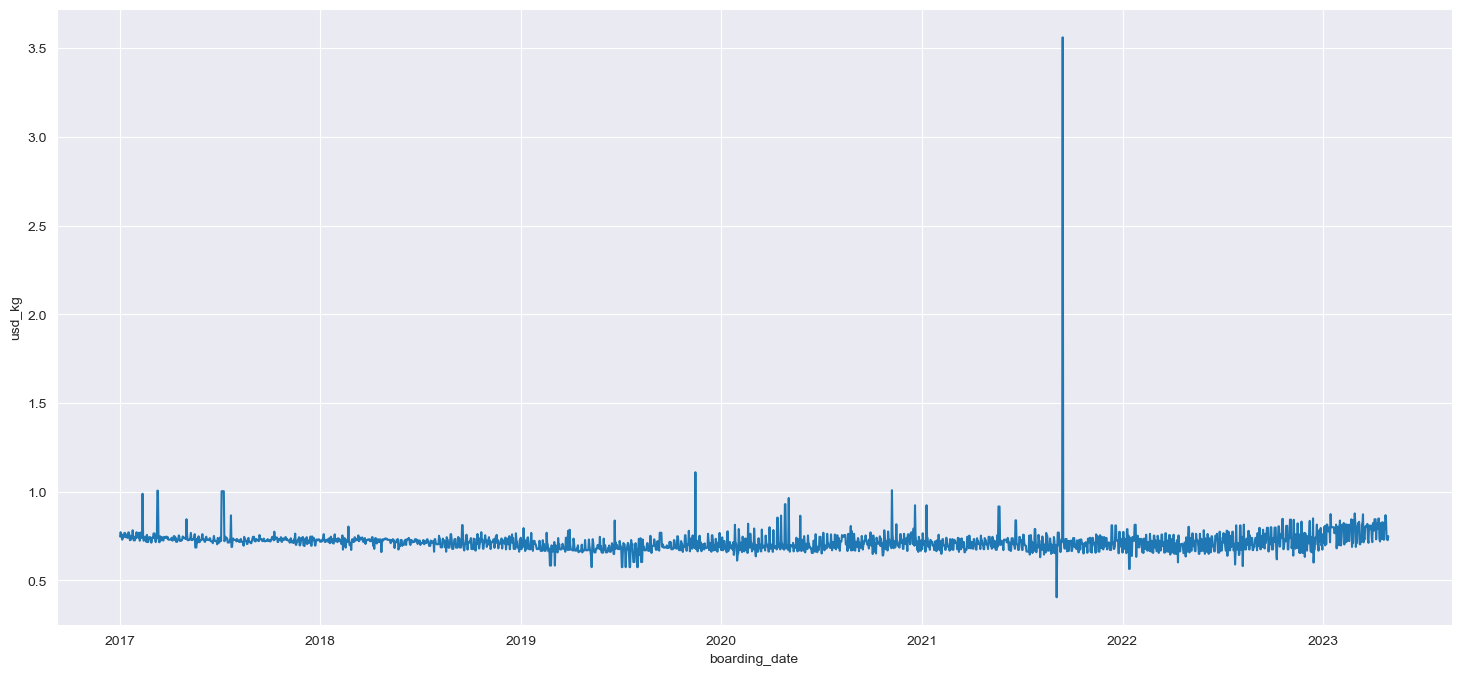

In [11]:
# Plot time series
plt.figure(figsize=(18,8))
sns.lineplot(x="boarding_date", y="usd_kg", data=usd_kg)
plt.show()

In [12]:
# total net weight time series
# Group by boarding_date
net_weight = heading_data[['boarding_date','net_weight']].groupby(by=['boarding_date']).sum().round(3)
# Impute missing dates assigning 0 kg for days without shipments
net_weight.index = pd.to_datetime(net_weight.index)
net_weight = net_weight.resample('D').asfreq()
net_weight.fillna(0.0, inplace=True)
net_weight

,net_weight
boarding_date,
2017-01-01,799070.660
2017-01-02,137138.400
2017-01-03,1446086.640
2017-01-04,1011158.800
2017-01-05,437534.800
...,...
2023-04-26,74191.200
2023-04-27,52243.200
2023-04-28,0.0


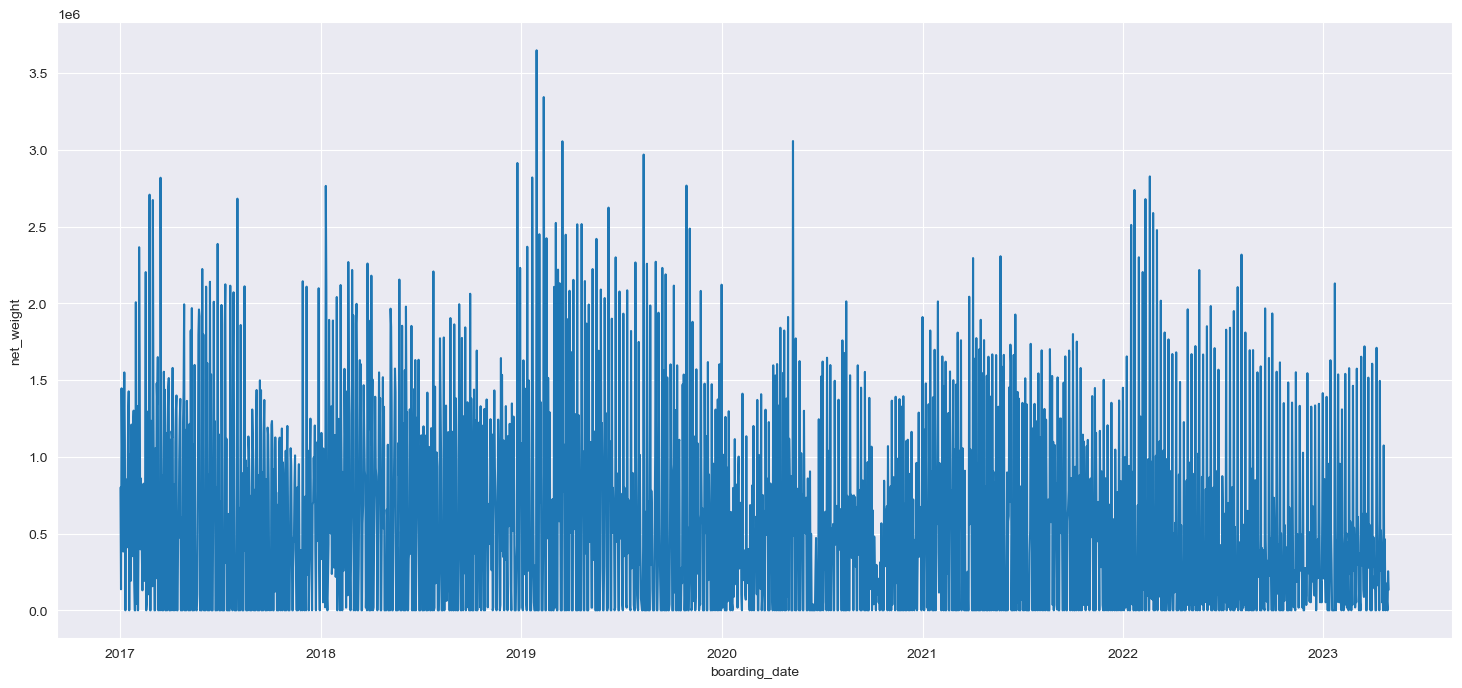

In [13]:
# Plot time series
plt.figure(figsize=(18,8))
sns.lineplot(x="boarding_date", y="net_weight", data=net_weight)
plt.show()

## Plots comparison

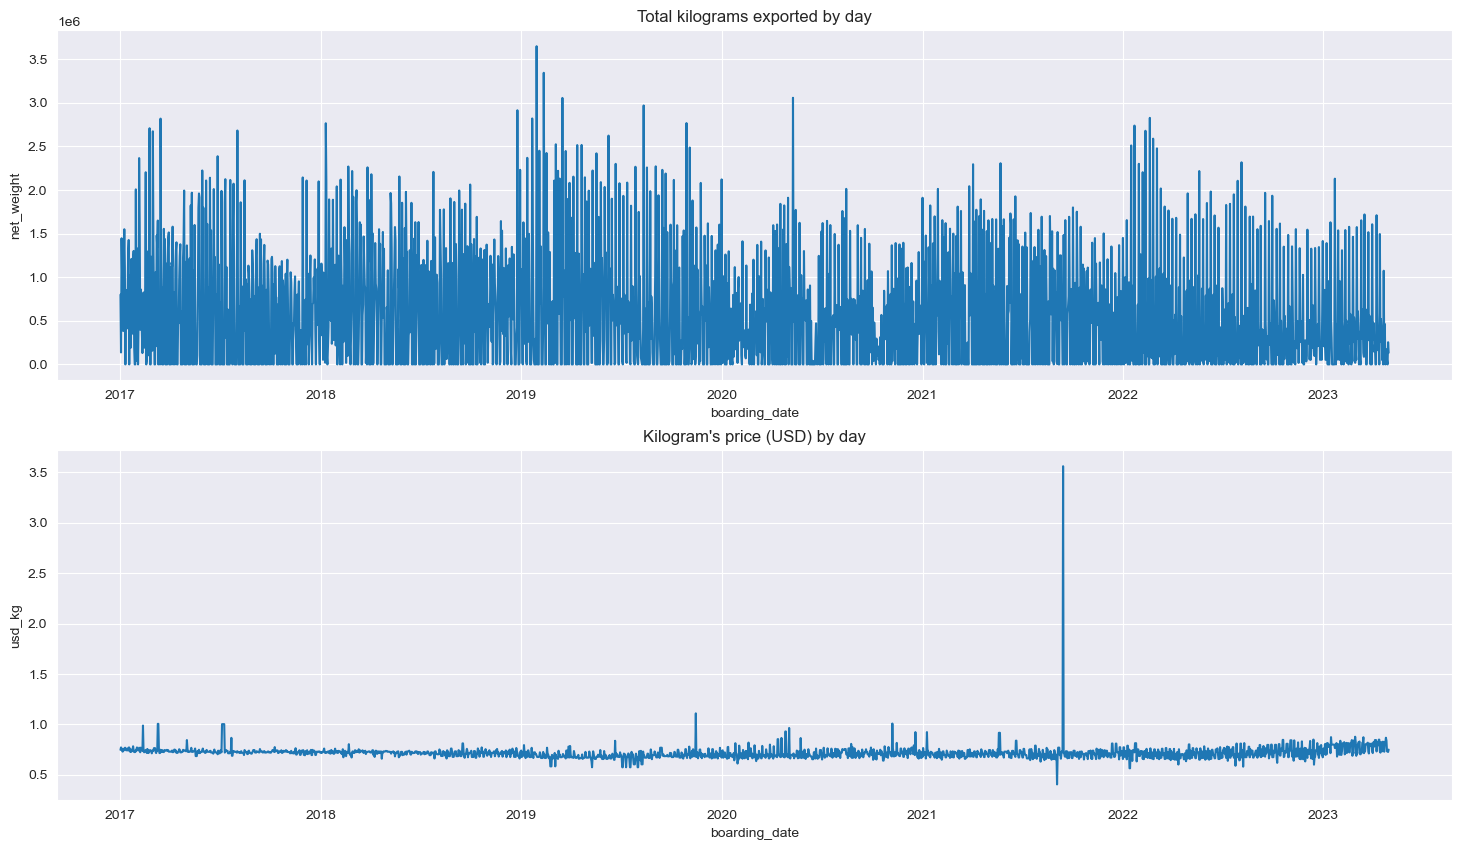

In [14]:
# create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))

# plot net_weight on the first subplot
sns.lineplot(x="boarding_date", y="net_weight", data=net_weight, ax=ax1)
ax1.set_title('Total kilograms exported by day')

# plot usd_kg on the second subplot
sns.lineplot(x="boarding_date", y="usd_kg", data=usd_kg, ax=ax2)
ax2.set_title('Kilogram\'s price (USD) by day')

plt.show()